In [ ]:
# %reload_ext autoreload
# %autoreload 2

from pathlib import Path
import sys 

# project_root = Path().cwd()
# scripts_dir = project_root / "src" / "scripts"
# sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import os s
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import seaborn as sns
import process_2p as p2p
from scalebars import add_scalebar
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
colors = ['#020202', '#ffffff', "#316dc1" ]
custom_cmap = LinearSegmentedColormap.from_list("custom_bwblue", colors, N=256)

In [107]:
fed_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/cue/fed'
fasted_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/cue/fasted'
all_avg_f, all_baseline_data, all_aligned_f, all_f = p2p.process_2p_folder(fasted_folder, fps = 15, align = 'cue', success = 'success')#, curate_trialno = True)
all_avg_fed, all_baseline_data_fed, all_aligned_fed, all_fed = p2p.process_2p_folder(fed_folder, fps = 15, align = 'cue', success = 'success')#, curate_trialno = True)

ValueError: cannot reshape array of size 255000 into shape (34,30,375)

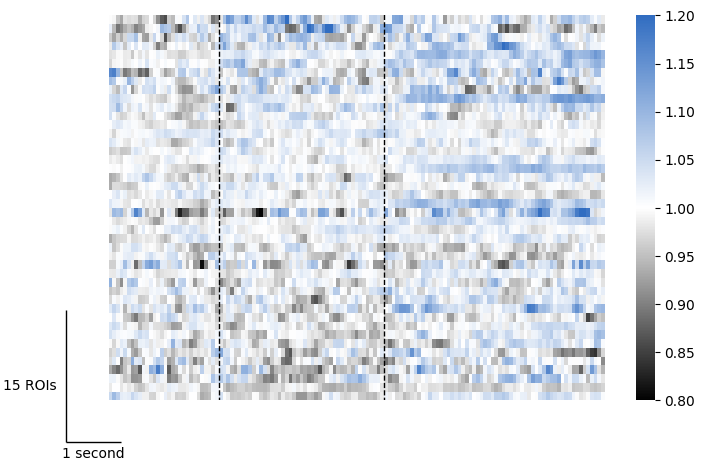

In [105]:
fig, ax = plt.subplots(1, figsize=(8, 5))
for cell in range(all_avg_f.shape[0]):
    all_avg_f[cell, :] = p2p.moving_average(all_avg_f[cell, :], 3)

ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))[::-1]
# ascending_order = np.argsort(np.nanmean(all_avg_f[:, 120:105], axis=1))[::-1]
sorted_avg_mean = all_avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
ax.vlines(x = [75, 120], ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/cue_aligned_fastedheatmap_line.pdf')

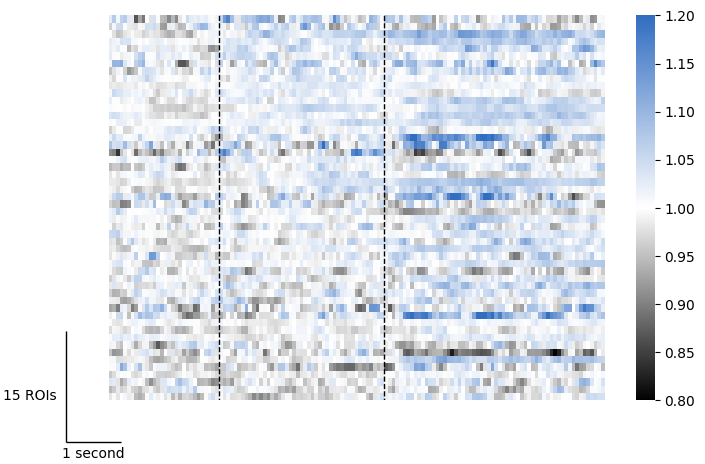

In [104]:
fig, ax = plt.subplots(1, figsize=(8, 5))
for cell in range(all_avg_fed.shape[0]):
    all_avg_fed[cell, :] = p2p.moving_average(all_avg_fed[cell, :], 3)

ascending_order = np.argsort(np.nanmean(all_avg_fed[:, 75:105], axis=1))[::-1]
sorted_avg_mean = all_avg_fed[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.20, cmap=custom_cmap)
ax.vlines(x = [75, 120], ymin = -1, ymax = all_avg_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-15, labely='15 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/cue_aligned_fedheatmap_line.pdf')

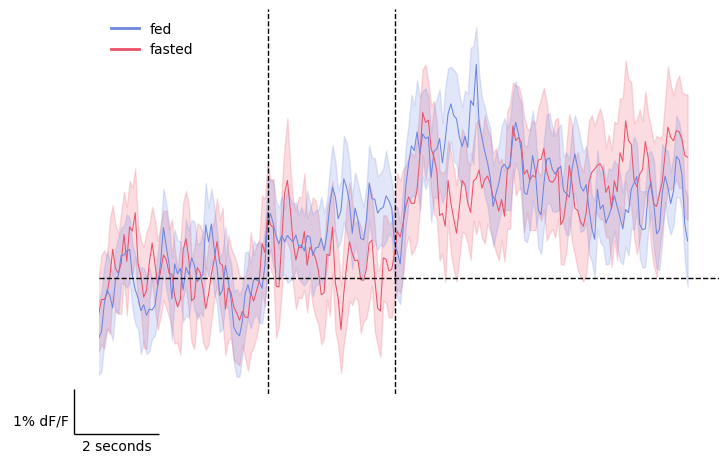

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_fasted = np.nanmean(all_avg_f, axis=0)
avg_fed = np.nanmean(all_avg_fed, axis=0)
avg_fasted = p2p.moving_average(avg_fasted, window_size = 3) - np.nanmean(avg_fasted[30:45]) + 1
avg_fed = p2p.moving_average(avg_fed, window_size = 3) - np.nanmean(avg_fed[30:50]) + 1
ax.plot(np.arange(0, 225), avg_fasted, color = '#eb5269', label = 'Activated', lw = 0.75)
ax.plot(np.arange(0, 225), avg_fed, color = '#6c86e0', label = 'Inhibited', lw = 0.75)
ax.fill_between(np.arange(0, 225), avg_fasted - stats.sem(all_avg_f, axis=0), avg_fasted + stats.sem(all_avg_f, axis=0), color = '#eb5269', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_fed - stats.sem(all_avg_fed, axis=0), avg_fed + stats.sem(all_avg_fed, axis=0), color = '#6c86e0', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axvline(x = 120, color = 'black', linestyle = '--', lw = 1)
# ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left = 15, right = 235)
sb = add_scalebar(ax, matchx=False, sizex=2*15, labelx='2 seconds', matchy=False, sep=4, sizey=0.01, labely='1% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
custom_handles = [
    Line2D([0], [0], color='#6c86e0', lw=2),
    Line2D([0], [0], color='#eb5269', lw=2)
]
custom_labels = ['fed', 'fasted']
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/cue_aligned_avgtrace.pdf')


In [ ]:
fasted_baseline_auc = p2p.get_auc(all_avg_f, start_frame = 45, end_frame= 75, normalize = 2000)
fed_baseline_auc = p2p.get_auc(all_avg_fed, start_frame = 45, end_frame= 75, normalize = 2000)

fasted_cue_auc = p2p.get_auc(all_avg_f, start_frame = 75, end_frame= 105, normalize = 2000)
fed_cue_auc = p2p.get_auc(all_avg_fed, start_frame = 75, end_frame= 105, normalize = 2000)

fasted_rwd_auc = p2p.get_auc(all_avg_f, start_frame = 120, end_frame= 150, normalize = 2000)
fed_rwd_auc = p2p.get_auc(all_avg_fed, start_frame = 120, end_frame= 150, normalize = 2000)





auc_df = pd.concat([
    pd.Series(fasted_baseline_auc, name='fasted_baseline_auc'),
    pd.Series(fed_baseline_auc, name='fed_baseline_auc'),
    pd.Series(fasted_cue_auc, name='fasted_cue_auc'),
    pd.Series(fed_cue_auc, name='fed_cue_auc'),
    pd.Series(fasted_rwd_auc, name='fasted_rwd_auc'),
    pd.Series(fed_rwd_auc, name='fed_rwd_auc')
], axis=1)

# Save to CSV
auc_df.to_csv('results/cue_auc_values.csv', index=False)